In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skspatial.objects import Line, Points, Plane

In [25]:
search_radius = 20

In [2]:
def open_line(file_name):
    '''
    Opens one of the text files and parses the line into a skspatial object
    '''
    
    with open(file_name) as f:
        lines = f.readlines()

    point = [float(dim) for dim in lines[0].split()[1:]]
    line = [float(dim) for dim in lines[1].split()[1:]]
    
    return Line(point, line)

In [22]:
chargedAAs_arr = pd.read_csv('./chargedAAs.csv',header=None).to_numpy()
chargedAAs = dict()
for pair in chargedAAs_arr:
    chargedAAs[pair[0]] = pair[1]
# print(chargedAAs)
# print(list(chargedAAs.keys()))

In [57]:
def charged_AA_loc(file_name):    

    with open(file_name) as pdb_structure:
        lines = pdb_structure.readlines()

    axis = open_line('./line_7DTC.txt')

    charged_AA = []
    charges = []

    for line in lines:
        line = line[:22] + ' ' + line[22:] # correct .pdb stupidity        
        line = line.split()

        if len(line) > 5:
            pass
        else:
            continue

        if line[2] == 'CA' and line[3] in list(chargedAAs.keys()):
            x = float(line[6])
            y = float(line[7])
            z = float(line[8])
            point = [x,y,z]
            if axis.distance_point(point) < search_radius:
                charged_AA.append(point)
                charges.append(chargedAAs[line[3]])


       

    return (np.array(charged_AA), charges)

In [61]:
def open_carbon_atoms(file_name):    

    with open(file_name) as pdb_structure:
        lines = pdb_structure.readlines()

    allCA_7EJ1 = list()

    for line in lines:
        line = line[:22] + ' ' + line[22:] # correct .pdb stupidity        

        if len(line.split()) > 5:
            residue_num = int(line.split()[5])
            chain = line.split()[4]
        else:
            continue

        if 'CA' in line:
            x = float(line.split()[6])
            y = float(line.split()[7])
            z = float(line.split()[8])
            data = [x,y,z]
            allCA_7EJ1.append(data)

    return np.array(allCA_7EJ1)

In [58]:

locs_charges = charged_AA_loc('../DATA/ALIGNED/SCN/6AGF.pdb')
axis = open_line('./line_7DTC.txt')
print(locs_charges)


(array([[120.593, 146.471, 116.939],
       [119.263, 142.932, 116.421],
       [113.631, 141.958, 120.905],
       [116.382, 139.791, 158.4  ],
       [118.083, 136.371, 163.355],
       [118.231, 135.152, 173.2  ],
       [121.787, 145.019, 170.614],
       [124.36 , 142.857, 168.844],
       [132.919, 131.852, 164.879],
       [126.795, 138.435, 159.919],
       [120.442, 144.391, 159.996],
       [122.77 , 137.535, 140.164],
       [127.392, 135.142, 140.321],
       [124.772, 129.512, 145.898],
       [117.87 , 128.727, 155.681],
       [124.8  , 137.332, 108.835],
       [128.254, 136.425, 105.313],
       [130.865, 141.931,  98.843],
       [134.325, 140.368,  98.635],
       [133.281, 138.056,  95.801],
       [131.321, 140.791,  94.03 ],
       [145.469, 127.952, 114.224],
       [134.218, 150.112, 156.643],
       [142.179, 145.025, 160.343],
       [142.768, 141.561, 148.73 ],
       [137.501, 139.062, 137.336],
       [132.368, 137.295, 139.435],
       [131.226, 140.501, 1

C:\Users\Mark\AppData\Local\Temp\ipykernel_16656\2959474217.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


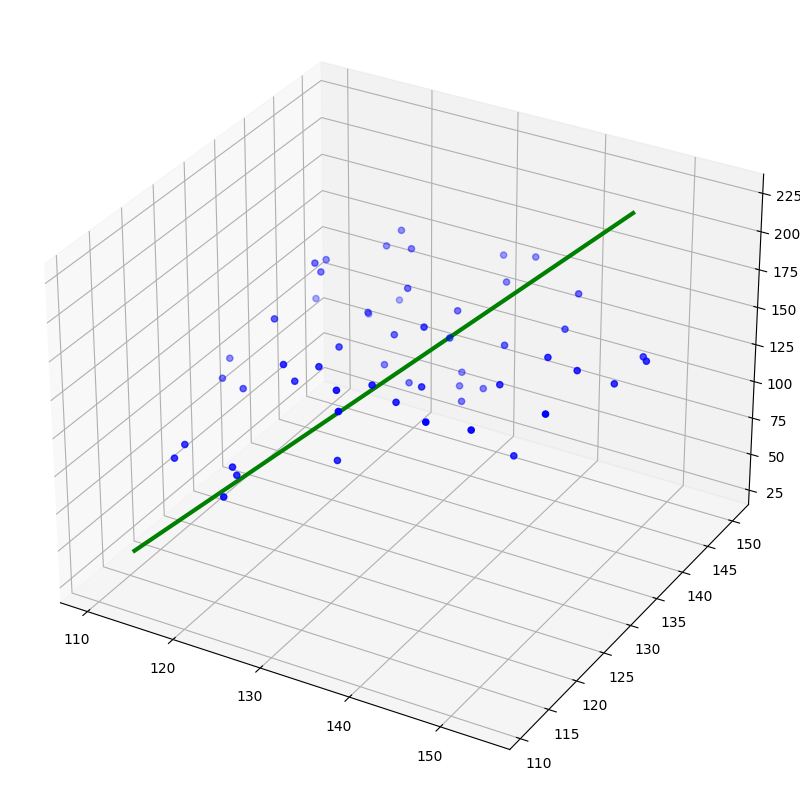

In [60]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

axis.plot_3d(ax, -100, 100, linewidth = 3, c = 'g')
ax.scatter(locs_charges[0][:,0], locs_charges[0][:,1], locs_charges[0][:,2], c = 'b', marker = 'o')
# ax.scatter(line.point[0], line.point[1], line.point[2], c = 'y', marker = 'o')
ax.set_label(['x','y','z'])
plt.show()

In [49]:
locs_charges[0][0][0]

120.593